# **EDA Used for Additional Insights**

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import backend as bk

#set plot style to 'ggplot' and don't limit the view of DF when diaplyhign them to screen
plt.style.use('ggplot')
pd.options.display.max_columns = None
%matplotlib inline

In [2]:
#importing our data and resetting our index
df = pd.read_excel('Data/Comp2_Raw_Data.xls')
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df = df.drop(columns = ['ID'])
df.columns = ['Credit_Limit', 'Gender', 'Education', 'Marriage',  'Age', 'Pay_Sept', 'Pay_Aug', 'Pay_Jul', 'Pay_Jun', 'Pay_May', 'Pay_Apr', 
             'Bill_Amt_Sept', 'Bill_Amt_Aug', 'Bill_Amt_Jul', 'Bill_Amt_Jun', 'Bill_Amt_May', 'Bill_Amt_Apr','Pay_Amt_Sept', 'Pay_Amt_Aug',
             'Pay_Amt_Jul', 'Pay_Amt_Jun', 'Pay_Amt_May', 'Pay_Amt_Apr', 'Default']

In [4]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [5]:
df.head(5)

,Default,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [6]:
df['Total_Billed_Amt'] = df['Bill_Amt_Sept'] + df['Bill_Amt_Aug'] + df['Bill_Amt_Jul'] + df['Bill_Amt_Jun'] + df['Bill_Amt_May'] + df['Bill_Amt_Apr']
df['Total_Pay_Amt'] = df['Pay_Amt_Sept'] + df['Pay_Amt_Aug'] + df['Pay_Amt_Jul'] + df['Pay_Amt_Jun'] + df['Pay_Amt_May'] + df['Pay_Amt_Apr']
df['Outstanding_Debt'] = df['Total_Billed_Amt'] - df['Total_Pay_Amt']

In [7]:
df['Gender_M'] = np.where(df['Gender'] ==1, 1, 0)
df['Gender_F'] = np.where(df['Gender'] ==2, 1, 0)

In [8]:
df['Education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: Education, dtype: int64

In [9]:
df['Age_Cat'] = df['Age'].apply(bk.assign_age)

In [10]:
df['Education'] = np.where(df['Education'] == 2,1,0)
df['Edu_College'] = np.where(df['Education']==1,1,0)
df['Edu_Other'] = np.where(df['Education']==0,1,0)

In [11]:
df['Education_Val'] = np.where(df['Education'] == 1,'College','Other')

In [12]:
df['Gender_Val'] = np.where(df['Gender'] ==1, 'M', 'F')

In [13]:
df['Binned_Cred_Lim'] = pd.qcut(df['Credit_Limit'], q=3, labels=['Low', 'Medium', 'High'])

In [14]:
df['Marriage'] = np.where(df['Marriage']==1,1,0)
df['Married'] = np.where(df['Marriage'] ==1, 1, 0)
df['Married_Other'] = np.where(df['Marriage']==0,1,0)
df['Marriage_Val'] = np.where(df['Marriage']==1,'Married', 'Other')

In [15]:
df.head()

,Default,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr,Total_Billed_Amt,Total_Pay_Amt,Outstanding_Debt,Gender_M,Gender_F,Age_Cat,Edu_College,Edu_Other,Education_Val,Gender_Val,Binned_Cred_Lim,Married,Married_Other,Marriage_Val
0,1,20000,2,1,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,7704,689,7015,0,1,21-40,1,0,College,F,Low,1,0,Married
1,1,120000,2,1,0,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,17077,5000,12077,0,1,21-40,1,0,College,F,Medium,0,1,Other
2,0,90000,2,1,0,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,101653,11018,90635,0,1,21-40,1,0,College,F,Medium,0,1,Other
3,0,50000,2,1,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,231334,8388,222946,0,1,21-40,1,0,College,F,Low,1,0,Married
4,0,50000,1,1,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,109339,59049,50290,1,0,41-60,1,0,College,M,Low,1,0,Married


In [16]:
#Probability of Defaulting
default_prob = df['Default'].sum() / len(df['Default'])
print('The probability of defaulting is', default_prob)

The probability of defaulting is 0.2212


In [17]:
pd.crosstab(df.Gender_Val, df.Default)

Default,0,1
Gender_Val,,
F,14349,3763
M,9015,2873


In [18]:
#Probability of Defaulting by Gender
prob_default_gender = df[['Gender_Val', "Default"]].groupby(['Gender_Val'],as_index=False).mean()
                                                      
print(prob_default_gender)

  Gender_Val   Default
0          F  0.207763
1          M  0.241672


In [19]:
df['Gender_Val'].value_counts()

F    18112
M    11888
Name: Gender_Val, dtype: int64

In [20]:
3763/18112

0.20776280918727916

In [21]:
#Percentage of Women in the Dataset
percent_women = df.Gender.value_counts() [2] / len(df.Gender)
print('The percentage of women in the dataset is', percent_women)

#Percentage of Men in the Dataset
percent_men = df.Gender.value_counts() [1] / len(df.Gender)
print('The percentage of men in the dataset is', percent_men)

The percentage of women in the dataset is 0.6037333333333333
The percentage of men in the dataset is 0.39626666666666666


In [49]:
df['Marriage_Val'].value_counts()

Other      16341
Married    13659
Name: Marriage_Val, dtype: int64

In [22]:
#Percentage of Women in the Dataset
percent_married = df.Marriage.value_counts() [1] / len(df.Marriage)
print('The percentage married', percent_married)

#Percentage of Men in the Dataset
percent_other = df.Marriage.value_counts() [0] / len(df.Marriage)
print('Not married', percent_other)

The percentage married 0.4553
Not married 0.5447


In [50]:
df['Education_Val'].value_counts()

Other      15970
College    14030
Name: Education_Val, dtype: int64

In [23]:
#Percentage of Women in the Dataset
percent_college = df.Education.value_counts() [1] / len(df.Education)
print('The percentage in college', percent_college)

#Percentage of Men in the Dataset
percent_other_school = df.Education.value_counts() [0] / len(df.Education)
print('Not in college', percent_other_school)

The percentage in college 0.4676666666666667
Not in college 0.5323333333333333


In [24]:
df.Age_Cat.value_counts()

21-40    21726
41-60     8002
61+        272
Name: Age_Cat, dtype: int64

In [25]:
print('21-40: ', 21726/30000)
print('41-60: ', 8002/30000)
print('61+: ', 272/30000)

21-40:  0.7242
41-60:  0.2667333333333333
61+:  0.009066666666666667


In [26]:
df.Binned_Cred_Lim.value_counts()

Low       10799
High       9622
Medium     9579
Name: Binned_Cred_Lim, dtype: int64

In [27]:
print('Low: ', 10799/30000)
print('High: ', 9622/30000)
print('Medium: ', 9579/30000)

Low:  0.35996666666666666
High:  0.3207333333333333
Medium:  0.3193


In [28]:
#More Info On Defaulting

#By Marriage
prob_married_default = df[['Default', "Marriage"]].groupby(['Default'],as_index=False).mean().sort_values(by='Marriage', ascending=False)
print(prob_married_default)

#By College Education
prob_college_gender = df[['Gender', "Education"]].groupby(['Gender'],as_index=False).mean()
print(prob_college_gender)



   Default  Marriage
1        1  0.483122
0        0  0.447398
   Gender  Education
0       1   0.452052
1       2   0.477915


## Below Starts Brian

In [29]:
prob_default_edu = df[['Education_Val', "Default"]].groupby(['Education_Val'],as_index=False).mean()
print(prob_default_edu)

  Education_Val   Default
0       College  0.237349
1         Other  0.207013


In [51]:
pd.crosstab(df.Education_Val, df.Default)

Default,0,1
Education_Val,,
College,10700,3330
Other,12664,3306


In [30]:
prob_default_mar = df[['Marriage_Val', "Default"]].groupby(['Marriage_Val'],as_index=False).mean()
print(prob_default_mar)

  Marriage_Val   Default
0      Married  0.234717
1        Other  0.209901


In [52]:
pd.crosstab(df.Marriage_Val, df.Default)

Default,0,1
Marriage_Val,,
Married,10453,3206
Other,12911,3430


In [31]:
prob_default_credit = df[['Binned_Cred_Lim', "Default"]].groupby(['Binned_Cred_Lim'],as_index=False).mean()
print(prob_default_credit)

  Binned_Cred_Lim   Default
0             Low  0.300583
1          Medium  0.205971
2            High  0.147267


In [53]:
pd.crosstab(df.Binned_Cred_Lim, df.Default)

Default,0,1
Binned_Cred_Lim,,
Low,7553,3246
Medium,7606,1973
High,8205,1417


In [32]:
prob_default_age = df[['Age_Cat', "Default"]].groupby(['Age_Cat'],as_index=False).mean()
print(prob_default_age)

  Age_Cat   Default
0   21-40  0.214490
1   41-60  0.237816
2     61+  0.268382


In [54]:
pd.crosstab(df.Age_Cat, df.Default)

Default,0,1
Age_Cat,,
21-40,17066,4660
41-60,6099,1903
61+,199,73


In [33]:
df.Age.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: Age, dtype: float64

In [34]:
df.Credit_Limit.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: Credit_Limit, dtype: float64

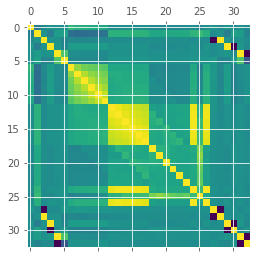

In [35]:
plt.matshow(df.corr())
plt.show()

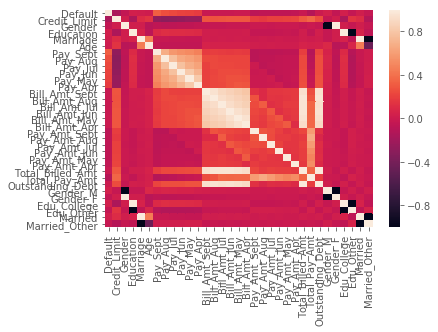

In [36]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [37]:
corr = df.corr()
corr.style.background_gradient(cmap='gist_heat').set_precision(2)

#if you look, the Pay_Apr-Pay_Sept correlation with default increases with time

,Default,Credit_Limit,Gender,Education,Marriage,Age,Pay_Sept,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Bill_Amt_Sept,Bill_Amt_Aug,Bill_Amt_Jul,Bill_Amt_Jun,Bill_Amt_May,Bill_Amt_Apr,Pay_Amt_Sept,Pay_Amt_Aug,Pay_Amt_Jul,Pay_Amt_Jun,Pay_Amt_May,Pay_Amt_Apr,Total_Billed_Amt,Total_Pay_Amt,Outstanding_Debt,Gender_M,Gender_F,Edu_College,Edu_Other,Married,Married_Other
Default,1,-0.15,-0.04,0.036,0.03,0.014,0.32,0.26,0.24,0.22,0.2,0.19,-0.02,-0.014,-0.014,-0.01,-0.0068,-0.0054,-0.073,-0.059,-0.056,-0.057,-0.055,-0.053,-0.013,-0.1,0.0039,0.04,-0.04,0.036,-0.036,0.03,-0.03
Credit_Limit,-0.15,1,0.025,-0.15,0.1,0.14,-0.27,-0.3,-0.29,-0.27,-0.25,-0.24,0.29,0.28,0.28,0.29,0.3,0.29,0.2,0.18,0.21,0.2,0.22,0.22,0.3,0.35,0.26,-0.025,0.025,-0.15,0.15,0.1,-0.1
Gender,-0.04,0.025,1,0.025,0.03,-0.091,-0.058,-0.071,-0.066,-0.06,-0.055,-0.044,-0.034,-0.031,-0.025,-0.022,-0.017,-0.017,-0.00024,-0.0014,-0.0086,-0.0022,-0.0017,-0.0028,-0.026,-0.0049,-0.026,-1,1,0.025,-0.025,0.03,-0.03
Education,0.036,-0.15,0.025,1,0.061,-0.078,0.099,0.12,0.12,0.11,0.1,0.098,0.03,0.029,0.022,0.022,0.02,0.025,-0.033,-0.033,-0.036,-0.027,-0.021,-0.026,0.026,-0.052,0.036,-0.025,0.025,1,-1,0.061,-0.061
Marriage,0.03,0.1,0.03,0.061,1,0.45,-0.016,-0.023,-0.031,-0.03,-0.034,-0.032,0.025,0.022,0.026,0.023,0.025,0.021,0.007,0.011,0.0053,0.015,0.0022,0.006,0.025,0.014,0.024,-0.03,0.03,0.061,-0.061,1,-1
Age,0.014,0.14,-0.091,-0.078,0.45,1,-0.039,-0.05,-0.053,-0.05,-0.054,-0.049,0.056,0.054,0.054,0.051,0.049,0.048,0.026,0.022,0.029,0.021,0.023,0.019,0.055,0.041,0.051,0.091,-0.091,-0.078,0.078,0.45,-0.45
Pay_Sept,0.32,-0.27,-0.058,0.099,-0.016,-0.039,1,0.67,0.57,0.54,0.51,0.47,0.19,0.19,0.18,0.18,0.18,0.18,-0.079,-0.07,-0.071,-0.064,-0.058,-0.059,0.19,-0.12,0.22,0.058,-0.058,0.099,-0.099,-0.016,0.016
Pay_Aug,0.26,-0.3,-0.071,0.12,-0.023,-0.05,0.67,1,0.77,0.66,0.62,0.58,0.23,0.24,0.22,0.22,0.22,0.22,-0.081,-0.059,-0.056,-0.047,-0.037,-0.037,0.24,-0.093,0.26,0.071,-0.071,0.12,-0.12,-0.023,0.023
Pay_Jul,0.24,-0.29,-0.066,0.12,-0.031,-0.053,0.57,0.77,1,0.78,0.69,0.63,0.21,0.24,0.23,0.23,0.23,0.22,0.0013,-0.067,-0.053,-0.046,-0.036,-0.036,0.24,-0.072,0.26,0.066,-0.066,0.12,-0.12,-0.031,0.031
Pay_Jun,0.22,-0.27,-0.06,0.11,-0.03,-0.05,0.54,0.66,0.78,1,0.82,0.72,0.2,0.23,0.24,0.25,0.24,0.24,-0.0094,-0.0019,-0.069,-0.043,-0.034,-0.027,0.24,-0.051,0.26,0.06,-0.06,0.11,-0.11,-0.03,0.03


In [38]:
df_time = pd.read_csv('Data/Output.csv')
df_time.head(5)

,Unnamed: 0,Default,Debt_Apr_May,Debt_May_Jun,Debt_Jun_Jul,Debt_Jul_Aug,Debt_Aug_Sept
0,0,1.0,0.0,0.0,1.0,1.0,1.0
1,1,1.0,1.0,-1.0,-1.0,-1.0,1.0
2,2,0.0,1.0,-1.0,-1.0,-1.0,1.0
3,3,0.0,-1.0,-1.0,1.0,-1.0,-1.0
4,4,0.0,1.0,-1.0,1.0,-1.0,1.0


In [39]:
df_time = df_time.drop(columns = ['Unnamed: 0'])
df_time['Def'] = df_time.Default
df_time = df_time.drop(columns = ['Default'])
df_time.head()

,Debt_Apr_May,Debt_May_Jun,Debt_Jun_Jul,Debt_Jul_Aug,Debt_Aug_Sept,Def
0,0.0,0.0,1.0,1.0,1.0,1.0
1,1.0,-1.0,-1.0,-1.0,1.0,1.0
2,1.0,-1.0,-1.0,-1.0,1.0,0.0
3,-1.0,-1.0,1.0,-1.0,-1.0,0.0
4,1.0,-1.0,1.0,-1.0,1.0,0.0


In [40]:
corr = df_time.corr()
corr.style.background_gradient(cmap='gist_heat').set_precision(2)

,Debt_Apr_May,Debt_May_Jun,Debt_Jun_Jul,Debt_Jul_Aug,Debt_Aug_Sept,Def
Debt_Apr_May,1,-0.1,0.13,0.071,0.071,-0.027
Debt_May_Jun,-0.1,1,-0.1,0.11,0.073,-0.033
Debt_Jun_Jul,0.13,-0.1,1,-0.092,0.13,-0.025
Debt_Jul_Aug,0.071,0.11,-0.092,1,-0.095,-0.028
Debt_Aug_Sept,0.071,0.073,0.13,-0.095,1,-0.035
Def,-0.027,-0.033,-0.025,-0.028,-0.035,1


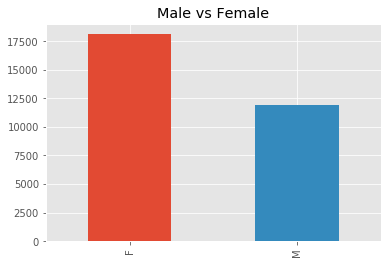

In [41]:
#Male/Female Graph
df.Gender_Val.value_counts().plot(kind = 'bar', title='Male vs Female')


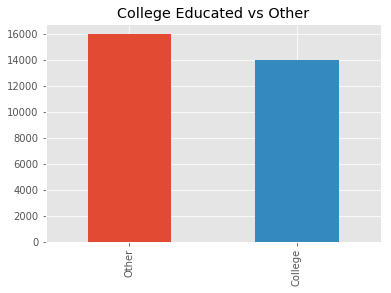

In [42]:
#College/Other Graph
df.Education_Val.value_counts().plot(kind = 'bar', title='College Educated vs Other')

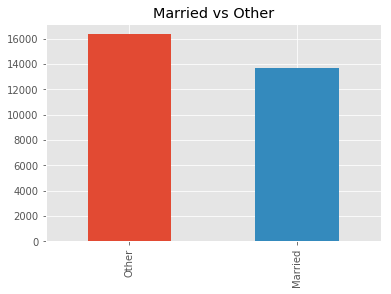

In [43]:
#Married/Other
df.Marriage_Val.value_counts().plot(kind = 'bar', title='Married vs Other')

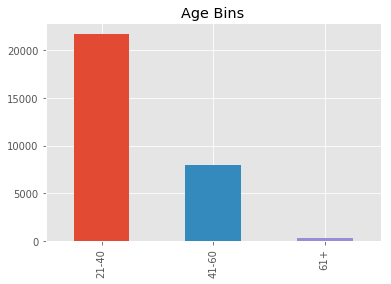

In [44]:
#Age Bins
df.Age_Cat.value_counts().plot(kind = 'bar', title='Age Bins')

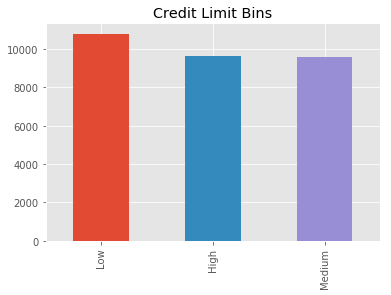

In [45]:
#Credit Limit
df.Binned_Cred_Lim.value_counts().plot(kind = 'bar', title='Credit Limit Bins')

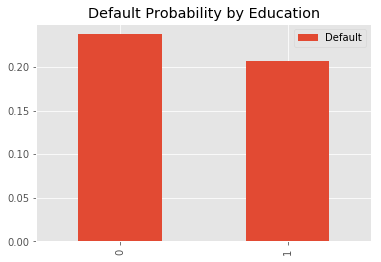

In [57]:
#Default Prob by Education
prob_default_edu = df[['Education_Val', "Default"]].groupby(['Education_Val'],as_index=False).mean()
prob_default_edu.plot(kind = 'bar', title='Default Probability by Education')

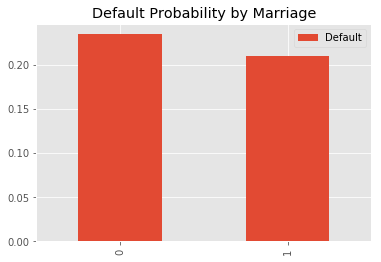

In [47]:
prob_default_mar = df[['Marriage_Val', "Default"]].groupby(['Marriage_Val'],as_index=False).mean()
prob_default_mar.plot(kind = 'bar', title='Default Probability by Marriage')

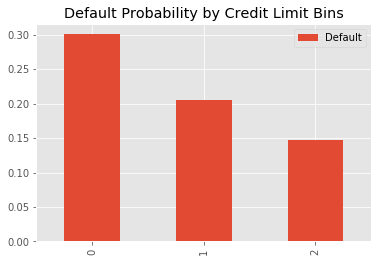

In [58]:
prob_default_credit = df[['Binned_Cred_Lim', "Default"]].groupby(['Binned_Cred_Lim'],as_index=False).mean()
prob_default_credit.plot(kind = 'bar', title='Default Probability by Credit Limit Bins')

AxesSubplot(0.125,0.125;0.775x0.755)


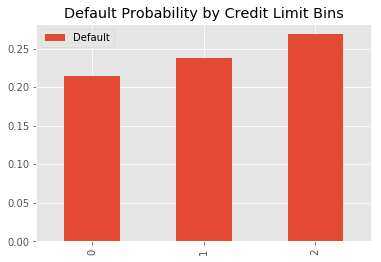

In [60]:
prob_default_age = df[['Age_Cat', "Default"]].groupby(['Age_Cat'],as_index=False).mean()
print(prob_default_age.plot(kind = 'bar', title='Default Probability by Credit Limit Bins'))

AxesSubplot(0.125,0.125;0.775x0.755)


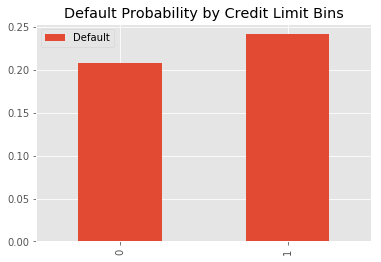

In [62]:
prob_default_gender = df[['Gender_Val', "Default"]].groupby(['Gender_Val'],as_index=False).mean()
print(prob_default_gender.plot(kind = 'bar', title='Default Probability by Credit Limit Bins'))

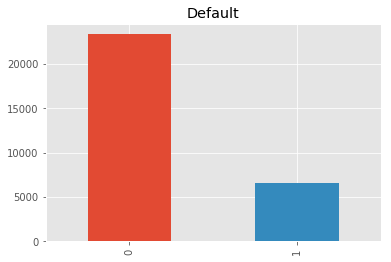

In [64]:
#Default
df.Default.value_counts().plot(kind = 'bar', title='Default')

In [ ]:
prob_default_def = df[["Default"]].groupby(['Default'],as_index=False).mean()
df['Default'].plot(kind = 'bar', title='Default Probability by Credit Limit Bins')